Import Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# To display stats about data
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# To display basic info about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Preprocessing the dataset

In [ ]:

# check for null values
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

Exploratory Data Analysis

<Axes: >

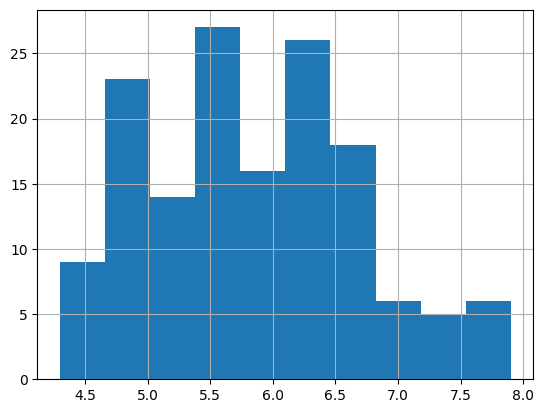

In [ ]:
# histograms
df['Sepal.Length'].hist()

<Axes: >

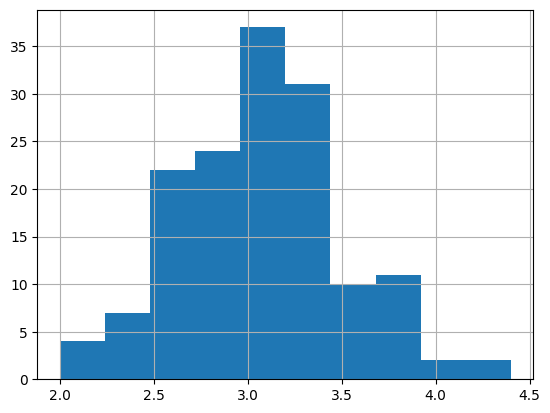

In [9]:
df['Sepal.Width'].hist()

<Axes: >

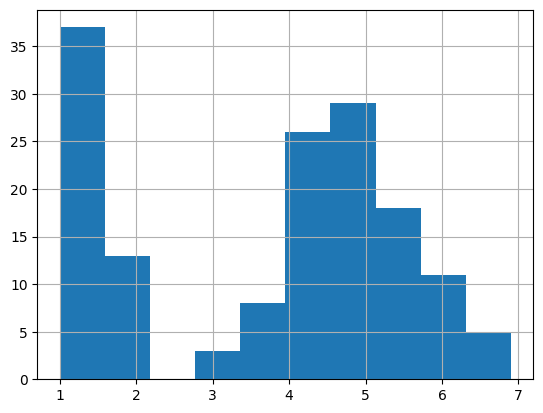

In [10]:
df['Petal.Length'].hist()

<Axes: >

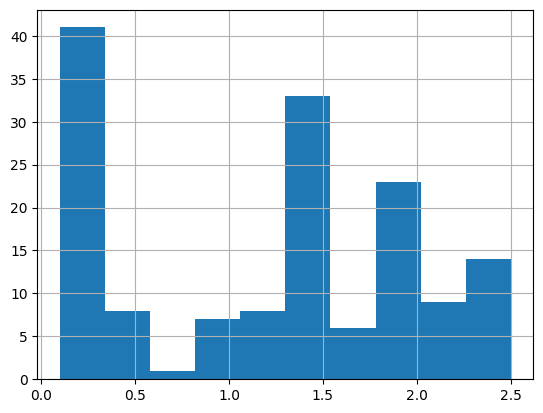

In [11]:
df['Petal.Width'].hist()

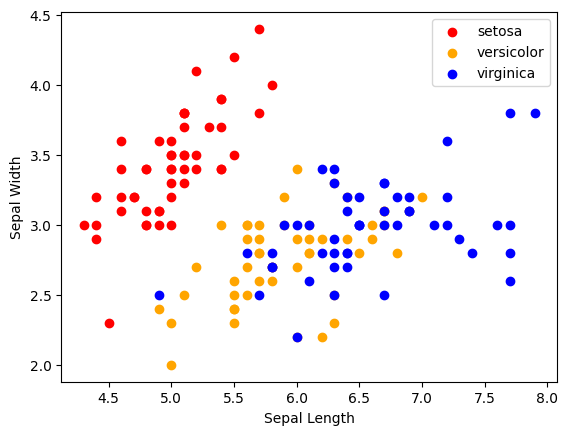

In [12]:
# scatterplots
colors = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

for i in range(3):
    x = df[df['Species'] == species[i]] 
    plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c = colors[i], label = species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

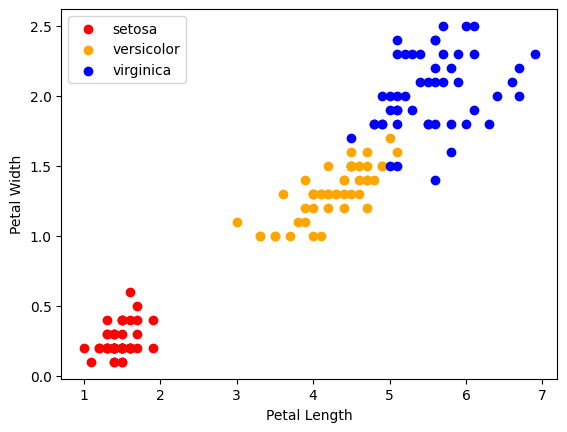

In [13]:
colors = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

for i in range(3):
    x = df[df['Species'] == species[i]] 
    plt.scatter(x['Petal.Length'], x['Petal.Width'], c = colors[i], label = species[i])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()

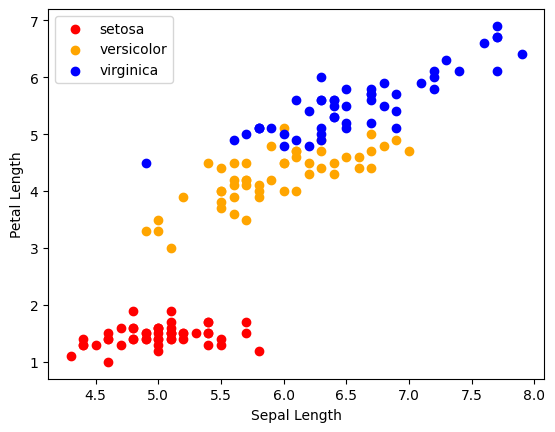

In [14]:
colors = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

for i in range(3):
    x = df[df['Species'] == species[i]] 
    plt.scatter(x['Sepal.Length'], x['Petal.Length'], c = colors[i], label = species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()

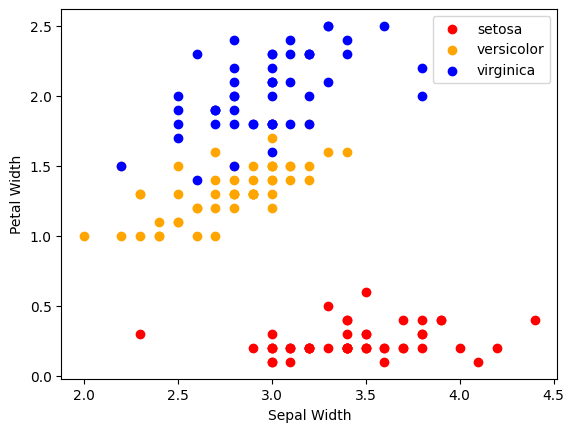

In [15]:
colors = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

for i in range(3):
    x = df[df['Species'] == species[i]] 
    plt.scatter(x['Sepal.Width'], x['Petal.Width'], c = colors[i], label = species[i])
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Width')
    plt.legend()

Correlation Matrix 

Shows the correlation between parameters, ranges from -1 to 1. High correlation means we can neglect any one of the constituting variables.

<Axes: >

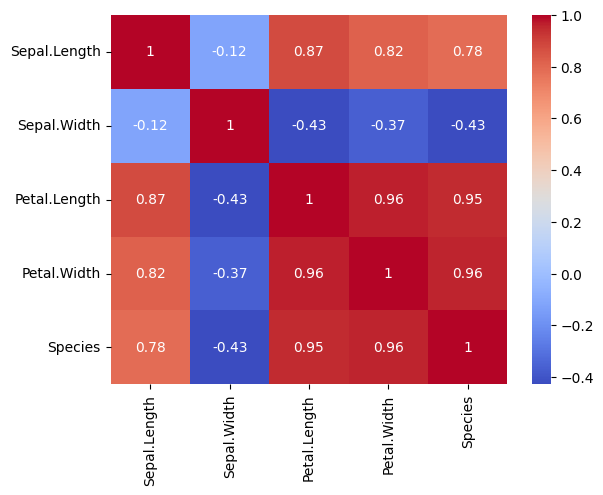

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Label Encoder

Usually datasets contain multiple labels. Label Encoding converts the labels into numeric form to facilitate machine functionalities

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


One Hot Encoding

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

X= df.drop(columns=['Species'])
Y= df['Species']


scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#Target variable is converted to One Hot Encoded Array, 3 for Three Species (Categories) 
Y = tf.keras.utils.to_categorical(Y, 3)

Model Training

In [ ]:
from tensorflow import keras
NB_CLASSES = 3      # This means the output should predict one of 3 classes
model = tf.keras.model.Sequential()

Layer-by-Layer Architecture

In [ ]:
# First Hidden Layer
model.add(keras.layers.Dense(128, input_shape=(4, ), name='Hidden-Layer-1', activation='relu'))
# Applies the ReLU (Rectified Linear Unit) activation function, where, relu(x) = max(0, x) which keeps only positive values.
# This layer takes 4 input features and outputs 128 values (activations).

# Second Hidden Layer
model.add(keras.layers.Dense(128, name='Hidden-Layer-2', activation='relu'))
# This layer receives input from the previous 128-neuron layer.

# Output Layer
model.add(keras.layer.Dense(NB_CLASSES, name='Output-Layer', activation='softmax'))
# activation='softmax' Converts raw output scores (logits) into probabilities that sum to 1.



Compile and Summary 

Model Training (Primitive)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.30)

In [45]:
# Logistic regression
# Model Training
from sklearn .linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, Y_train,)

LogisticRegression()

In [46]:
# Print metric to get performance
print('Accurance: ', model.score(X_test, Y_test)*100)


Accurance:  95.55555555555556


In [47]:
# Import knn (k-nearest neighbours)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(X_train, Y_train)

KNeighborsClassifier()

In [48]:
# Print metric to get performance
print('Accurance: ', model.score(X_test, Y_test)*100)

Accurance:  97.77777777777777


In [49]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [50]:
# Print metric to get performance
print('Accurance: ', model.score(X_test, Y_test)*100)

Accurance:  93.33333333333333
